<a href="https://colab.research.google.com/github/KOdunga/AIMLCourse/blob/main/inferential_Stats_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import scipy.stats as stats

In [43]:
bookseller = pd.read_csv('bookseller.csv')
debugging = pd.read_csv('debugging.csv')
sat_score = pd.read_csv('sat_score.csv')
bookseller.sample(4)

,S.No,Date,Number of Books Sold
84,85,25-03-2020,93
110,111,20-04-2020,90
352,353,18-12-2020,97
132,133,12-05-2020,99


In [44]:
debugging.sample(4)

,Bug ID,Time Taken to fix the bug
1321,14307,1.83
1780,14766,1.92
1654,14640,4.56
208,13194,1.20


In [45]:
sat_score.sample(4)

,student_id,score
355,356,749
390,391,1072
179,180,950
289,290,935


Probability that a visitor will buy something wen they visist a shop.
- n - 10; number of sampled visitors
- p - 0.80; probability of success
- q - 0.20 (1.0 -0.80); probability of failure
- x - 10 number of succeses

In [46]:
k = np.arange(0,11)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [47]:
from scipy.stats import binom #We use the binomial function
n = 10
p =0.8

binomial = binom.pmf(k=k, n=n, p=p)  # apply the probability mass fucntion, as this is a discrete probability distribution

In [48]:
binomial

array([1.02400000e-07, 4.09600000e-06, 7.37280000e-05, 7.86432000e-04,
       5.50502400e-03, 2.64241152e-02, 8.80803840e-02, 2.01326592e-01,
       3.01989888e-01, 2.68435456e-01, 1.07374182e-01])

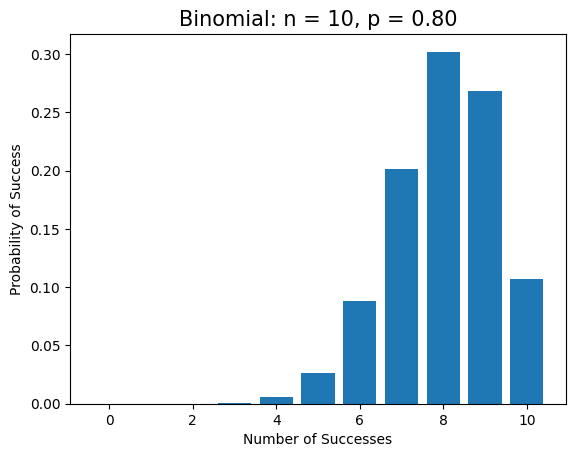

In [49]:
#plot the probabilities for better view
plt.bar(k, binomial)
plt.title('Binomial: n = %i, p = %.2f'% (n,p), fontsize = 15)
plt.xlabel('Number of Successes')
plt.ylabel('Probability of Success')
plt.show()

In [50]:
binomial[10]

0.10737418240000006

What is the probability that a amximum of 7 people would buy something?
- We apply a sum to the probabilitioes from 0 to 7 using a cummulative density function (cdf)

In [51]:
binom.cdf(k = 7, n = n, p = p)

0.32220047359999987

Probability of being 8 or more is 1 minus the above

In [52]:
1 - binom.cdf(k = 7, n = n, p = p)

0.6777995264000001

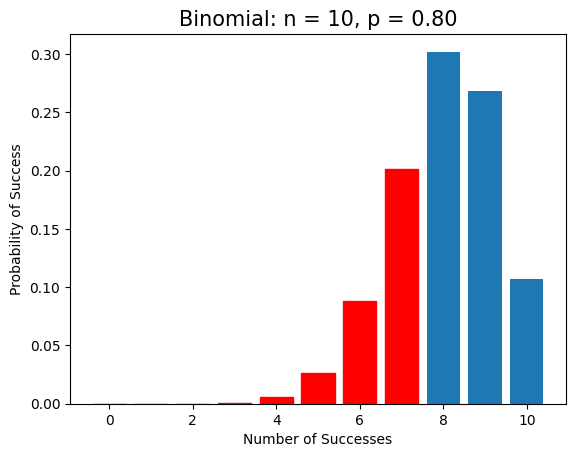

In [53]:
barl = plt.bar(k, binomial)
plt.title('Binomial: n = %i, p = %.2f'% (n,p), fontsize = 15)
plt.xlabel('Number of Successes')
plt.ylabel('Probability of Success')
for i in range(0,8):
  barl[i].set_color('r')
plt.show()

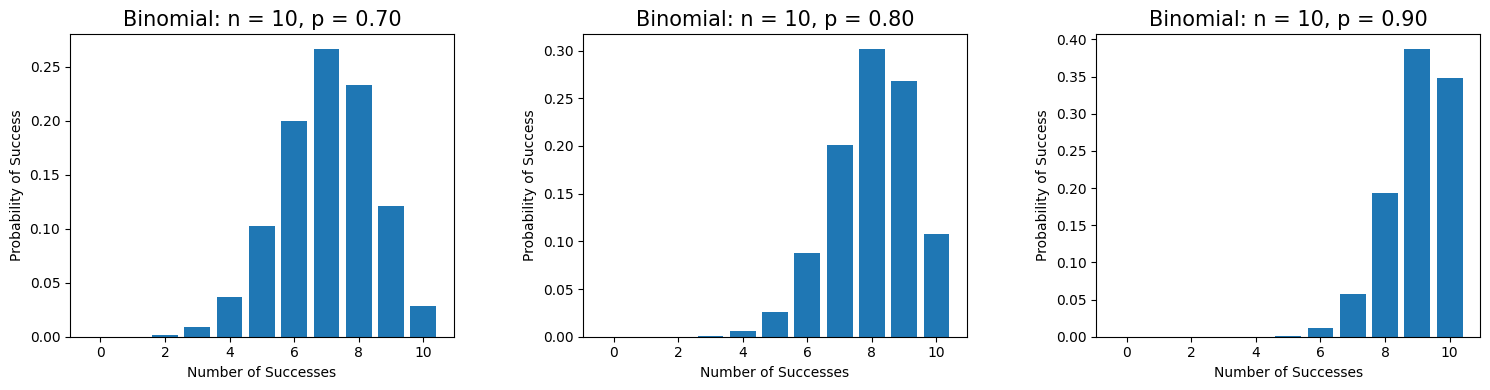

In [54]:
plt.figure(figsize = (15,4))

plt.subplot(131)
binomial_70 = binom.pmf(k,n,p=0.7)

plt.bar(k, binomial_70)
plt.title('Binomial: n = %i, p = %.2f'% (n,0.7), fontsize = 15)
plt.xlabel('Number of Successes')
plt.ylabel('Probability of Success')

plt.subplot(132)
binomial_80 = binom.pmf(k,n,p=0.8)

plt.bar(k, binomial_80)
plt.title('Binomial: n = %i, p = %.2f'% (n,p), fontsize = 15)
plt.xlabel('Number of Successes')
plt.ylabel('Probability of Success')

plt.subplot(133)
binomial_90 = binom.pmf(k,n,p=0.9)

plt.bar(k, binomial_90)
plt.title('Binomial: n = %i, p = %.2f'% (n,0.9), fontsize = 15)
plt.xlabel('Number of Successes')
plt.ylabel('Probability of Success')

plt.tight_layout(w_pad =5)
plt.show()

## Uniform Distribution
- Time taken to fix bugs
- use debugging.csv file

In [55]:
debugging.head()

,Bug ID,Time Taken to fix the bug
0,12986,2.42
1,12987,2.03
2,12988,2.74
3,12989,3.21
4,12990,3.40


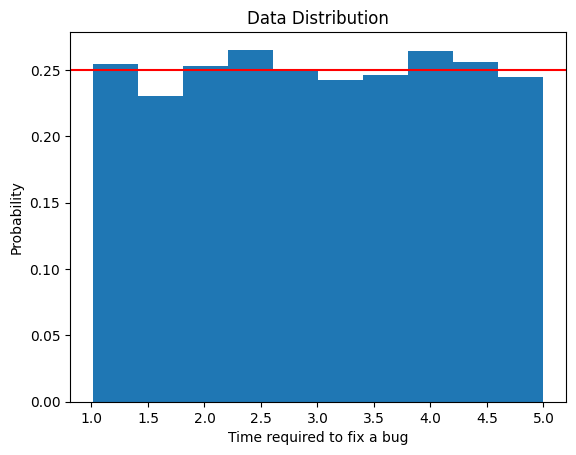

In [56]:
plt.hist(debugging['Time Taken to fix the bug'], density = True)
plt.axhline(1/4, color = 'red')
plt.xlabel('Time required to fix a bug')
plt.ylabel('Probability')
plt.title('Data Distribution')
plt.show()


<ipython-input-57-7561f7e0b2cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(debugging['Time Taken to fix the bug'])


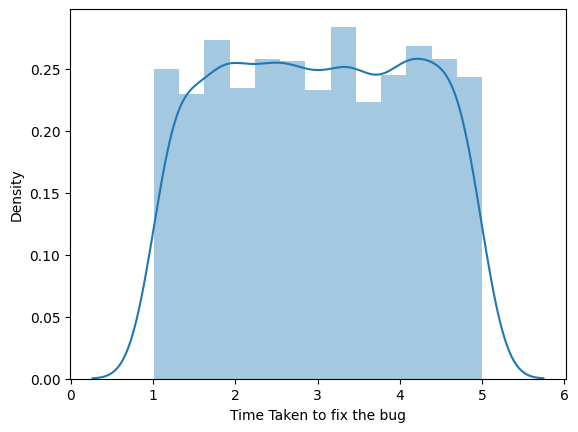

In [57]:
sns.distplot(debugging['Time Taken to fix the bug'])
plt.show()

In [58]:
from scipy.stats import uniform

#use the uniform pmf() function to generate the probabiliyy distribution
x = np.linspace(1,5,50)
probs = uniform.pdf(x, loc = 1, scale =4)


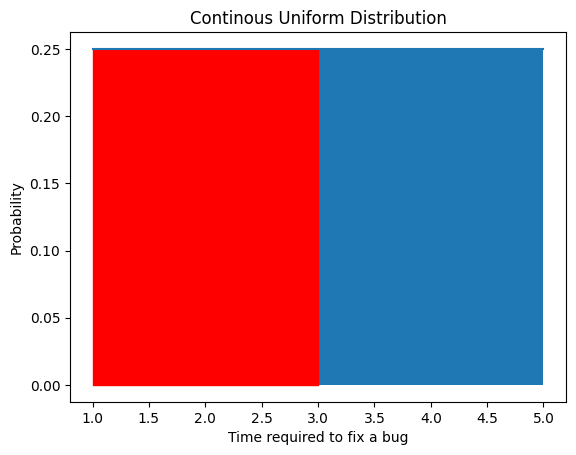

In [59]:
x1 = np.linspace(1,3,25)

plt.plot(x, probs)
plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x = x1, loc = 1, scale = 4), color = 'red')
plt.xlabel('Time required to fix a bug')
plt.ylabel('Probability')
plt.title('Continous Uniform Distribution')
plt.show()

In [60]:
uniform.cdf(x = 3, loc = 1, scale = 4)

0.5

Calculate the probability that a randomly selected software debugging requires more than 2 hours.
- We use the uniform.cdf function but we subtract from one as we are looking at the area to the right of the graph.

In [61]:
1 - uniform.cdf(x = 2, loc = 1, scale = 4)

0.75

Calculate the 50th percentile of software debugging time.
- This works opposite of cdf as you are given the probability and asked to return a point.
- We use the uniform.ppf() function

In [62]:
uniform.ppf(q=0.5, loc = 1, scale =4)

3.0

## Normal Distribution

In [63]:
sat_score.head()

,student_id,score
0,1,1018
1,2,1218
2,3,611
3,4,723
4,5,541


In [64]:
sat_score.shape

(1000, 2)

In [65]:
from scipy.stats import norm

mu = sat_score['score'].mean()
sigma = sat_score['score'].std()
print('The mean is', round(mu,2))
print('The standard deviation is',round(sigma,2))

The mean is 1007.46
The standard deviation is 204.43


Plotting the distribution

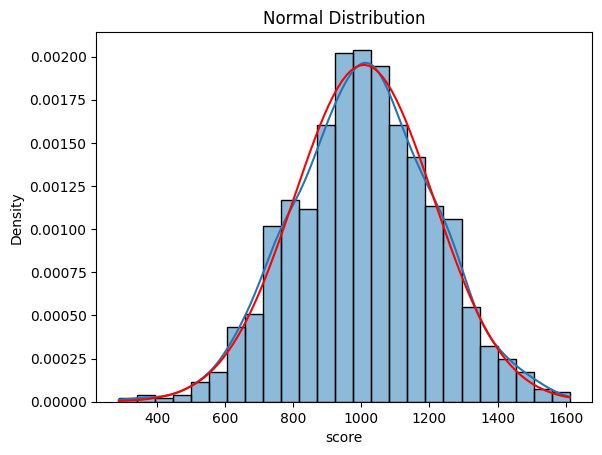

In [66]:
#Calculate the pdf of SAT Scores using norm.pdf()
density = pd.DataFrame()
density['x'] = np.linspace(
    sat_score['score'].min() - 0.01, sat_score['score'].max()+0.01, 100
)
density['pdf'] = norm.pdf(density['x'],mu, sigma)

fig, ax = plt.subplots()
#Plot the distribution of data using a histogram
sns.histplot(sat_score['score'], ax = ax, kde = True, stat = 'density')
#plot the pdf of the normal distribution
ax.plot(density['x'], density['pdf'], color = 'red')
plt.title('Normal Distribution')
plt.show()

This shows that this data is normal and we can apply norm functions on it to determine probabilities

Calculate the probability that a student will score less than 800 in SAT exam

In [67]:
#find the cummulative probability.
#norm.cdf() calculates the cumulative probability

prob_less_than_800 = norm.cdf(800,mu,sigma)
print('The probability that a student will score less than 800 in an SAT exam is', round(prob_less_than_800*100,2),'%')

The probability that a student will score less than 800 in an SAT exam is 15.51 %


Plot the above output

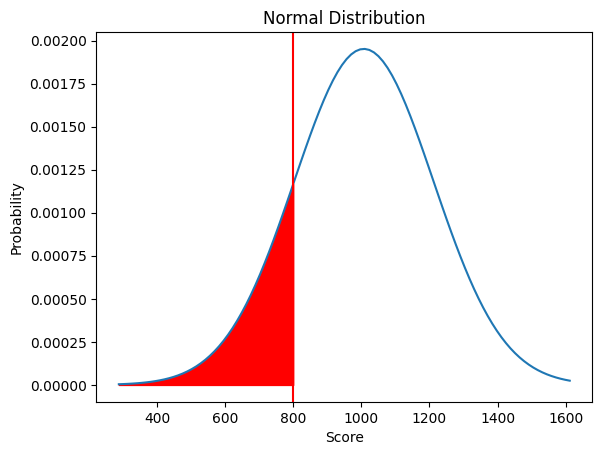

In [68]:
plt.plot(density['x'],density['pdf'])
plt.axvline(x = 800, color = 'red')
x1 = np.linspace(density['x'].min(),800,50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color='red')
plt.xlabel('Score')
plt.ylabel('Probability')
plt.title('Normal Distribution')
plt.show()

**Calculate the probability that a student will score more than 1300 in SAT exam**

In [69]:
prob_greater_than_1300 = 1 - norm.cdf(1300, mu, sigma)
prob_greater_than_1300

0.07621063272885598

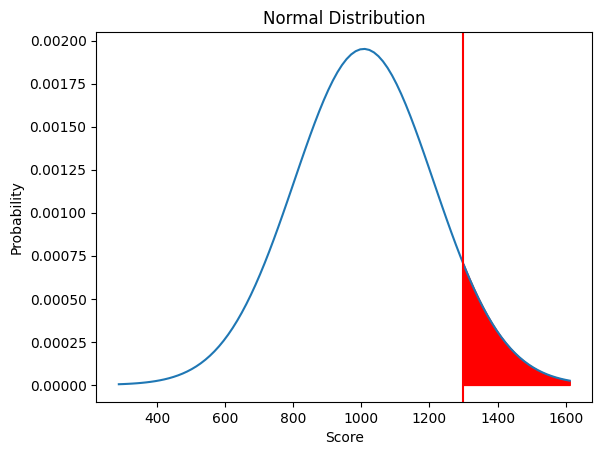

In [70]:
plt.plot(density['x'],density['pdf'])
plt.axvline(x = 1300, color = 'red')
x1 = np.linspace(1300,density['x'].max(),50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color='red')
plt.xlabel('Score')
plt.ylabel('Probability')
plt.title('Normal Distribution')
plt.show()

Calculate the minimum marks a student must score in order to be in the 90th percentile

In [71]:
#we use the ppf() function  as we are coming from a probability to get a score
score_90th_percentile = norm.ppf(0.90, mu, sigma)
print('The 90th percentile score is', round(score_90th_percentile))

The 90th percentile score is 1269


Plot the probability distribution for the above to better visualize the score

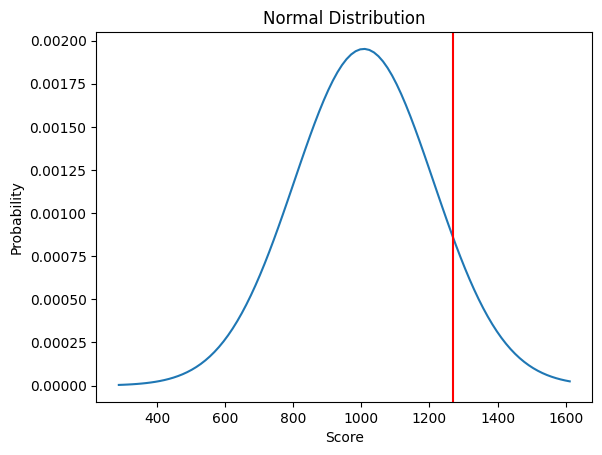

In [72]:
plt.plot(density['x'],density['pdf'])
plt.axvline(x = score_90th_percentile, color = 'red')
plt.xlabel('Score')
plt.ylabel('Probability')
plt.title('Normal Distribution')
plt.show()

**Calculate the minimum marks a student must score in order to be in the top 5%**

In [73]:
score_top_five_percent = norm.ppf(0.95, mu, sigma)
score_top_five_percent

1343.7108592761278

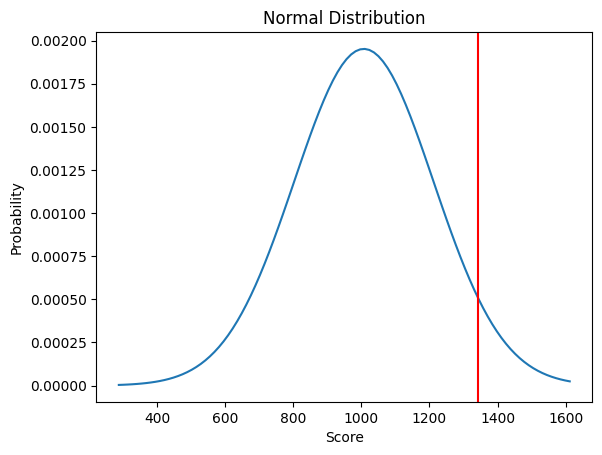

In [74]:
plt.plot(density['x'],density['pdf'])
plt.axvline(x = score_top_five_percent, color = 'red')
plt.xlabel('Score')
plt.ylabel('Probability')
plt.title('Normal Distribution')
plt.show()

## **Central Limit Theorem**

- If we independently draw multiple samples from a population, take each mean and plot these sample means, then the plot will tend to normal distribution as the size of the sample increases, regardless of the shape of the original population distribution.

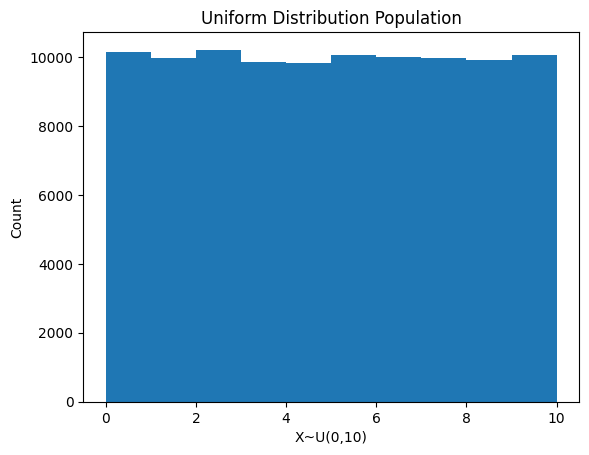

In [75]:
from scipy.stats import uniform

#Setting the seed for reproducibility
np.random.seed(1)

#Creating a uniform distribution population of size 100,000
uniform_pop = uniform.rvs(0,10, size = 100000)

#Visualizing the uniform distribution
plt.hist(uniform_pop)
plt.title('Uniform Distribution Population')
plt.xlabel('X~U(0,10)')
plt.ylabel('Count')
plt.show()


From this data, draw samples of size =5, get their mean, do this 500 times.

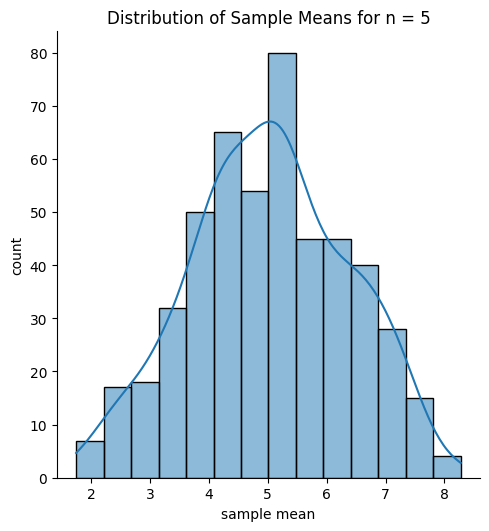

In [77]:
# set the seed for reproducibility
np.random.seed(1)
# set the sample size to 5
n = 5
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(500):
    # draw a sample of size n
    sample = np.random.choice(uniform_pop, size=n)
    # calculate the sample mean
    sample_mean = np.mean(sample)
    # append the sample mean to the sample_means list
    sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

[5.271456979336589, 5.117999033662156, 4.830427743525141, 5.87665126937993, 5.198182967732433, 5.616624222271664, 3.799263295646872, 5.0801942699258955, 5.981934968821019, 5.937273483158629, 4.349211410569487, 6.212796456019353, 3.6026899414922684, 5.4746162238124585, 4.4173439594815385, 5.222400271274626, 5.336971631507516, 4.397718944908691, 4.26920635086365, 5.876577403979172, 4.893746584823451, 5.449336941872302, 4.818205142123892, 6.377876260089274, 6.226534398077039, 4.938995227738137, 4.622494747553977, 4.123821953702415, 5.87325126542033, 5.947965585984162, 5.2943405000124555, 4.923722952735503, 7.0604812218686765, 3.868807940328886, 5.868981960319973, 3.9847386220494396, 4.329469592534021, 5.024108997819053, 5.3734054769042, 6.673178399401134, 5.47943178428402, 3.9359362166573666, 3.7708149204302033, 6.4848361709388325, 5.206541594286857, 4.7652391077134935, 6.560404923351689, 5.651642057446304, 4.7233481566943185, 4.444195503934783, 4.814244618596098, 6.162077757094969, 5.014

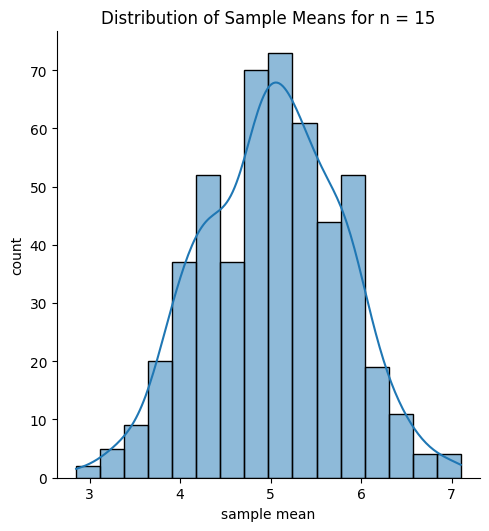

In [80]:
#Set the seed for reproducibility
np.random.seed(1)
#set the sample size to 15
n=15
#List to store the 500 means
sample_means = []
#now iterate the loop to draw multiple samples
for j in range(500):
  #draw a sample of size 15
  sample = np.random.choice(uniform_pop, size = n)
  #Calculate the mean
  sample_mean = np.mean(sample)
  #append the sample mean to the sample means list
  sample_means.append(sample_mean)

print(sample_means)
#plot the histogram of sample means
sns.displot(sample_means, kde = True)

plt.title('Distribution of Sample Means for n = '+str(n))
plt.xlabel('sample mean')
plt.ylabel('count')
plt.show()

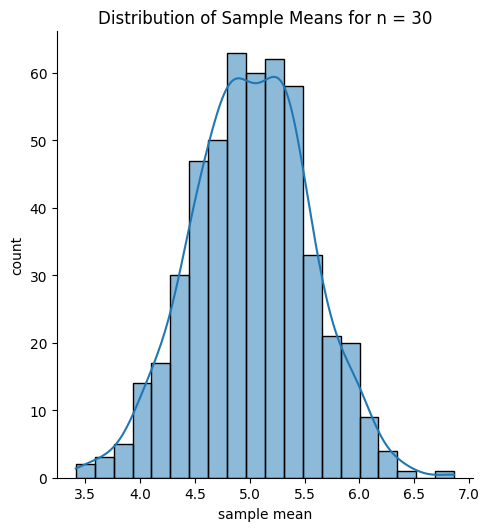

In [82]:
#Set the seed for reproducibility
np.random.seed(1)
#set the sample size to 30
n=30
#List to store the 500 means
sample_means = []
#now iterate the loop to draw multiple samples
for j in range(500):
  #draw a sample of size 30
  sample = np.random.choice(uniform_pop, size = n)
  #Calculate the mean
  sample_mean = np.mean(sample)
  #append the sample mean to the sample means list
  sample_means.append(sample_mean)

#plot the histogram of sample means
sns.displot(sample_means, kde = True)

plt.title('Distribution of Sample Means for n = '+str(n))
plt.xlabel('sample mean')
plt.ylabel('count')
plt.show()

[5.268219070178348, 5.196672096802772, 5.348111303056979, 4.76400992441236, 5.115702332815526, 4.868147520944743, 5.219181772137314, 5.4866444727608545, 5.275842187317326, 5.520937077397609, 4.674582329843254, 5.524851291951141, 4.399803643028816, 5.968487509252765, 4.938425978439776, 5.329958053867404, 4.966279505783539, 4.38927978878605, 5.135315793673084, 4.271110599058063, 5.001510416988674, 4.812943367864816, 4.856117085738679, 4.8589567266534415, 5.4524516551657, 4.346282734283379, 5.2464934955695135, 5.455991954766954, 5.011567369307604, 5.076071814445786, 4.463150558502543, 5.666627289367722, 3.9679549540085435, 5.00597715636004, 5.994115066000742, 5.51430515672979, 4.749620212325231, 4.778343779764442, 5.501041828822749, 5.486458800815448, 4.4729121912885335, 4.348990925037455, 4.249835387978961, 4.677365131305434, 4.635029765579534, 5.527143375709013, 5.131874061099595, 4.917346048118589, 5.3228042738412675, 4.844337725711338, 4.476898256946581, 4.775178774004891, 4.888389461

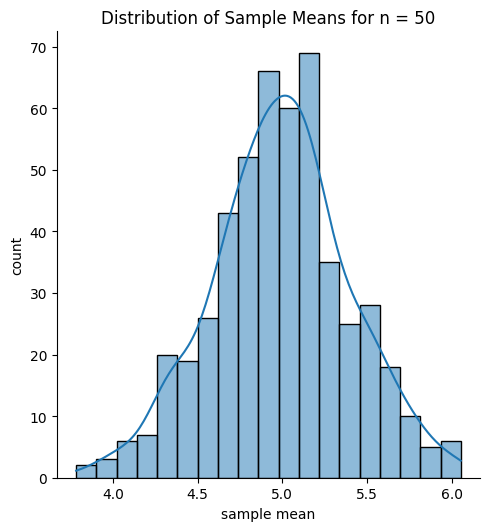

In [83]:
#Set the seed for reproducibility
np.random.seed(1)
#set the sample size to 50
n=50
#List to store the 500 means
sample_means = []
#now iterate the loop to draw multiple samples
for j in range(500):
  #draw a sample of size 50
  sample = np.random.choice(uniform_pop, size = n)
  #Calculate the mean
  sample_mean = np.mean(sample)
  #append the sample mean to the sample means list
  sample_means.append(sample_mean)

print(sample_means)
#plot the histogram of sample means
sns.displot(sample_means, kde = True)

plt.title('Distribution of Sample Means for n = '+str(n))
plt.xlabel('sample mean')
plt.ylabel('count')
plt.show()

Sampling distribution moves closer to normality as the sample size increases

## Using a normal distribution dat instead of uniform data

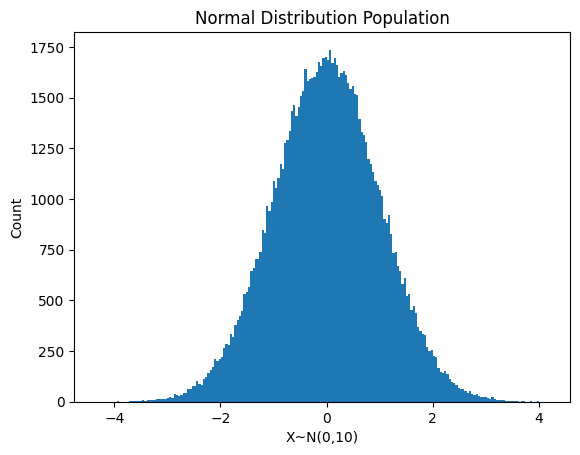

In [86]:
from scipy.stats import norm

#Setting the seed for reproducibility
np.random.seed(1)

#Creating a uniform distribution population of size 100,000
normal_pop = norm.rvs(0,1, size = 100000)

#Visualizing the uniform distribution
plt.hist(normal_pop,200)
plt.title('Normal Distribution Population')
plt.xlabel('X~N(0,10)')
plt.ylabel('Count')
plt.show()

[0.09727114591028665, 0.13409946781605372, 0.3185951367205514, 0.051040693181884055, 0.7071513570737795, -0.29197075712475035, 0.07303973640716548, 0.6839083161970626, 0.17790708008690378, -0.5248280778944128, -0.222556787005117, -0.016423842198680517, -0.5355452407752821, -0.0773548861032042, -0.02121453249053402, -0.24785117625389336, 0.3214165312894545, 0.060355867611135004, 0.04337502381097539, -0.2376775843386083, 0.19552833550825183, -0.45527781138715395, -0.968309679459687, 0.48113422191652216, -0.09615539945513556, 0.4545404287510558, 0.7119024351045675, -0.23931520618168306, -0.06535180153104295, 0.41263915647173144, 0.24182010693323144, -0.19047894985337907, 0.29344226232744436, 0.23177636966899168, 1.1322579286542669, 0.2871705975128204, -0.0573464899833783, 0.05225759830079561, -0.2521432253140962, -0.6063479741992642, 0.14278939475077315, 0.42740088189840775, -0.25267213947977146, 0.47153969572268417, -0.10428306361447788, -0.18914578923821687, 0.26521060339920355, 0.62744

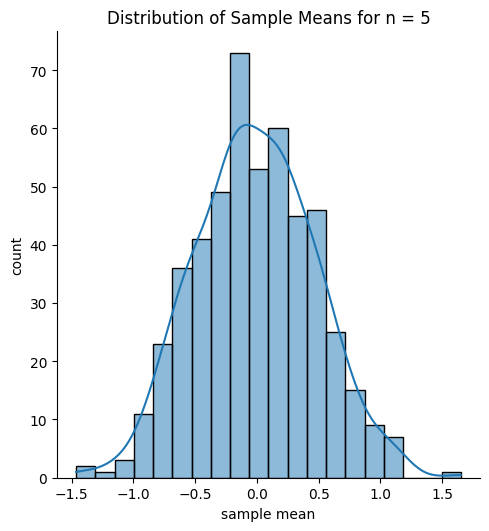

In [88]:
#Set the seed for reproducibility
np.random.seed(1)
#set the sample size to 5
n=5
#List to store the 500 means
sample_means = []
#now iterate the loop to draw multiple samples
for j in range(500):
  #draw a sample of size 5
  sample = np.random.choice(normal_pop, size = n)
  #Calculate the mean
  sample_mean = np.mean(sample)
  #append the sample mean to the sample means list
  sample_means.append(sample_mean)

print(sample_means)
#plot the histogram of sample means
sns.displot(sample_means, kde = True)

plt.title('Distribution of Sample Means for n = '+str(n))
plt.xlabel('sample mean')
plt.ylabel('count')
plt.show()

With normal data, even small sample sizes work okay to generate a bell shape, but bigger samples still give better results

## Use of an extremely un normal distribution such as an exponential distribution

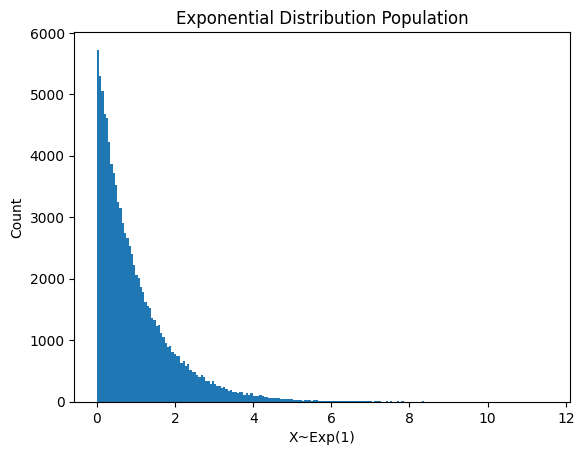

In [89]:
, expon_gen
from scipy.stats import expon

#Setting the seed for reproducibility
np.random.seed(1)

#Creating a uniform distribution population of size 100,000
exponential_pop = expon.rvs(size = 100000)

#Visualizing the uniform distribution
plt.hist(exponential_pop,200)
plt.title('Exponential Distribution Population')
plt.xlabel('X~Exp(1)')
plt.ylabel('Count')
plt.show()

[1.0808987181305878, 1.639905040265516, 0.7664580949608043, 1.5762683311675825, 0.25874894778980845, 1.2724996495010958, 0.8107073065748637, 1.0646298199612407, 1.0141631662886332, 1.8163632025867784, 0.5031878100196355, 1.7049362707429807, 0.6066298857961424, 0.9029567934948604, 1.8125000341137767, 1.0039225575476878, 0.9277510392908281, 1.5951833667971513, 0.5796790187132712, 1.3787762259897929, 0.3145820149084161, 1.445687200219151, 0.46513518304022217, 1.0257795309103446, 2.7576209359222683, 1.4586390142170373, 0.8947183756669908, 1.8233940124568426, 0.7435488620260126, 1.1636961492683082, 1.954109103202701, 0.3556728550894261, 1.174628980353925, 1.5663486830796594, 1.34239991065906, 1.044622284481614, 0.8799190374192483, 0.6905015995482354, 0.3494638749023121, 1.1371090093847314, 1.1377193229808291, 1.1618092319816653, 0.7997908207281896, 0.7824992060018594, 0.8148298644904903, 1.0444480321426652, 1.6724340657102552, 1.3578152296403594, 1.206090789624798, 1.241670938721814, 0.8337

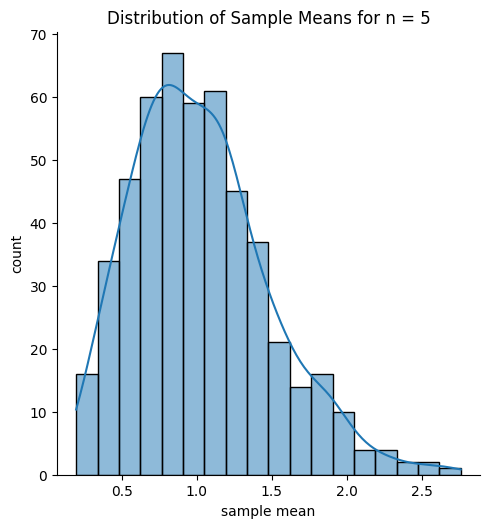

In [90]:
#Set the seed for reproducibility
np.random.seed(1)
#set the sample size to 5
n=5
#List to store the 500 means
sample_means = []
#now iterate the loop to draw multiple samples
for j in range(500):
  #draw a sample of size 5
  sample = np.random.choice(exponential_pop, size = n)
  #Calculate the mean
  sample_mean = np.mean(sample)
  #append the sample mean to the sample means list
  sample_means.append(sample_mean)

print(sample_means)
#plot the histogram of sample means
sns.displot(sample_means, kde = True)

plt.title('Distribution of Sample Means for n = '+str(n))
plt.xlabel('sample mean')
plt.ylabel('count')
plt.show()

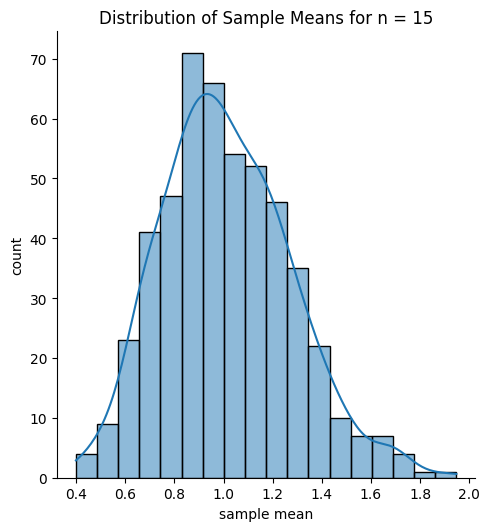

In [91]:
#Set the seed for reproducibility
np.random.seed(1)
#set the sample size to 5
n=15
#List to store the 500 means
sample_means = []
#now iterate the loop to draw multiple samples
for j in range(500):
  #draw a sample of size 5
  sample = np.random.choice(exponential_pop, size = n)
  #Calculate the mean
  sample_mean = np.mean(sample)
  #append the sample mean to the sample means list
  sample_means.append(sample_mean)

#plot the histogram of sample means
sns.displot(sample_means, kde = True)

plt.title('Distribution of Sample Means for n = '+str(n))
plt.xlabel('sample mean')
plt.ylabel('count')
plt.show()

[1.0991297969692326, 1.1523312626956888, 1.1414906128400746, 0.8682731956301998, 1.4736028915929102, 1.2396303028110642, 0.8927536793695037, 1.0786362031189698, 0.918084264495823, 0.9836330788743768, 1.0164758376848935, 1.2013234645846171, 1.3672698632689833, 0.7781762995353598, 1.1923240335685514, 0.8719538417111764, 1.1580405955937656, 0.9418376433849559, 1.103500688636011, 1.2870559190351156, 0.9735709836080452, 1.041993748487792, 0.8776114550829901, 1.4039050096933692, 0.799536229603145, 1.279860774196363, 1.0442647257817586, 0.953673702410009, 1.006024413070317, 0.8651989653607266, 1.1538261550459314, 0.9737132166856735, 0.7354660008077916, 0.9297595889403301, 0.9660410843547709, 1.1045985249084123, 0.857424539391736, 0.8903961468652984, 0.7360086700080648, 1.0831665517152225, 1.2753091788887958, 1.1792305832269603, 0.7649285151344664, 0.8520143503343698, 0.9301271320138453, 1.2953339615686514, 1.283209821277057, 0.9935687802302868, 0.9607555309859419, 1.0192841238212897, 0.639060

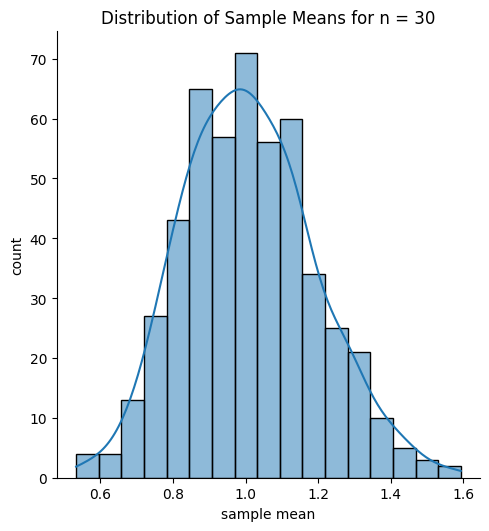

In [92]:
#Set the seed for reproducibility
np.random.seed(1)
#set the sample size to 30
n=30
#List to store the 500 means
sample_means = []
#now iterate the loop to draw multiple samples
for j in range(500):
  #draw a sample of size 30
  sample = np.random.choice(exponential_pop, size = n)
  #Calculate the mean
  sample_mean = np.mean(sample)
  #append the sample mean to the sample means list
  sample_means.append(sample_mean)

print(sample_means)
#plot the histogram of sample means
sns.displot(sample_means, kde = True)

plt.title('Distribution of Sample Means for n = '+str(n))
plt.xlabel('sample mean')
plt.ylabel('count')
plt.show()

## **Estimation**
- Point Estimation
- Interval Estimation

In [95]:
#Point Estimate
sample = np.array([120,55,60,10,8,150,44,58,62,123])
x_bar = np.mean(sample) #Mean is used. Can also be median, mode etc
x_bar

69.0

**Calculating intervals**

The mean amount of coffee dispenced by a cofee maker is 110mg. The standard deviation from this amount as indicated by the manufacturer is 7mg. Construct a 95% confidence interval for the mean, using a random sample of 50 cups from the machine.

In [96]:
from scipy.stats import norm

x_bar, sigma = 110,7

n = 50

np.round(norm.interval(0.95, loc = x_bar, scale = sigma/np.sqrt(n)),2)

array([108.06, 111.94])

**T Distribution**
- Used when the standard deviation is not given and has to be generated from the mean of the data
- More accurate when the sample size is greater than 30
-We can applt the t-distribution to the example above

In [98]:
from scipy.stats import t
x_bar, s = 110,7
n = 50
k=n-1

np.round(t.interval(0.95,df = k, loc = x_bar, scale = s/np.sqrt(n)),2)

array([108.01, 111.99])